In [1]:
import torch
import molgrid
from molgrid.openbabel import pybel as pybel

In [2]:
sdf = '''lig.pdb


 28 31  0  0  0  0  0  0  0  0999 V2000
  -12.3750   15.6630   41.2650 C   0  0  0  0  0  0  0  0  0  0  0  0
  -13.2610   14.3660   39.8260 C   0  0  0  0  0  0  0  0  0  0  0  0
  -14.1090   14.4140   41.0570 C   0  0  0  0  0  0  0  0  0  0  0  0
  -13.4740   15.2840   42.0050 N   0  0  0  0  0  0  0  0  0  0  0  0
  -12.1510   15.2100   40.0160 N   0  0  0  0  0  0  0  0  0  0  0  0
  -16.6176   14.1407   40.7369 C   0  0  0  0  0  0  0  0  0  0  0  0
  -15.3520   13.6930   41.3060 C   0  0  0  0  0  0  0  0  0  0  0  0
  -16.4718   11.9054   42.3009 C   0  0  0  0  0  0  0  0  0  0  0  0
  -17.7694   13.3442   41.0488 C   0  0  0  0  0  0  0  0  0  0  0  0
  -15.3321   12.5656   42.0833 N   0  0  0  0  0  0  0  0  0  0  0  0
  -17.6782   12.2407   41.8231 N   0  0  0  0  0  0  0  0  0  0  0  0
  -16.3982   10.8282   43.0485 N   0  0  0  0  0  0  0  0  0  0  0  0
  -17.2100   10.3051   43.2395 H   0  0  0  0  0  0  0  0  0  0  0  0
  -15.5311   10.5438   43.4180 H   0  0  0  0  0  0  0  0  0  0  0  0
  -13.2773   14.5917   44.3887 C   0  0  0  0  0  0  0  0  0  0  0  0
  -13.5557   14.9516   45.8687 C   0  0  0  0  0  0  0  0  0  0  0  0
  -13.4526   17.4692   45.3119 C   0  0  0  0  0  0  0  0  0  0  0  0
  -13.2634   17.1035   43.8042 C   0  0  0  0  0  0  0  0  0  0  0  0
  -13.8090   15.6920   43.4140 C   0  0  0  0  0  0  0  0  0  0  0  0
  -13.0728   16.3354   46.2392 N   0  0  0  0  0  0  0  0  0  0  0  0
  -12.0543   16.3036   46.2844 H   0  0  0  0  0  0  0  0  0  0  0  0
  -14.2602   13.6411   37.6205 C   0  0  0  0  0  0  0  0  0  0  0  0
  -14.2997   12.7333   36.5337 C   0  0  0  0  0  0  0  0  0  0  0  0
  -13.4040   11.6421   36.4989 C   0  0  0  0  0  0  0  0  0  0  0  0
  -12.4709   11.4518   37.5318 C   0  0  0  0  0  0  0  0  0  0  0  0
  -12.4272   12.3524   38.6174 C   0  0  0  0  0  0  0  0  0  0  0  0
  -13.3220   13.4750   38.6950 C   0  0  0  0  0  0  0  0  0  0  0  0
  -13.4377   10.7705   35.4697 F   0  0  0  0  0  0  0  0  0  0  0  0
 15 16  1  0  0  0
 15 19  1  0  0  0
 16 20  1  0  0  0
 17 18  1  0  0  0
 17 20  1  0  0  0
 18 19  1  0  0  0
 19  4  1  0  0  0
 22 23  2  0  0  0
 22 27  1  0  0  0
 23 24  1  0  0  0
 24 25  2  0  0  0
 24 28  1  0  0  0
 25 26  1  0  0  0
 26 27  2  0  0  0
 27  2  1  0  0  0
  1  5  2  0  0  0
  1  4  1  0  0  0
  2  3  2  0  0  0
  2  5  1  0  0  0
  3  4  1  0  0  0
  3  7  1  0  0  0
  6  7  2  0  0  0
  6  9  1  0  0  0
  7 10  1  0  0  0
  8 11  1  0  0  0
  8 12  1  0  0  0
  8 10  2  0  0  0
  9 11  2  0  0  0
 20 21  1  0  0  0
 12 13  1  0  0  0
 12 14  1  0  0  0
M  END
> <minimizedAffinity>
0.00000

> <minimizedRMSD>
0.64667

$$$$'''

Create a CoordinateSet from a pybel molecule and use that to grid.

In [3]:
mol = pybel.readstring('sdf',sdf)
c = molgrid.CoordinateSet(mol)

In [4]:
gmaker = molgrid.GridMaker()
dims = gmaker.grid_dimensions(molgrid.defaultGninaLigandTyper.num_types())
gridtensor = torch.zeros(dims,dtype=torch.float32)

In [5]:
gmaker.forward(c.center(),c,gridtensor)

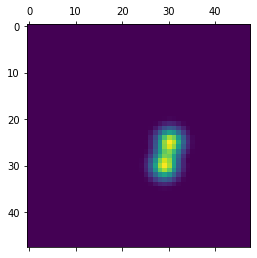

In [6]:
import matplotlib.pyplot as plt
plt.matshow(gridtensor[0,24,:,:])

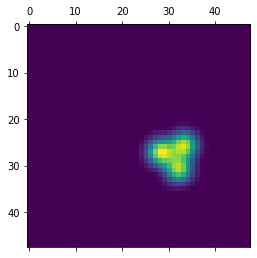

In [7]:
plt.matshow(gridtensor[1,24,:,:])